In [1]:
import numpy as np
from scipy import optimize as opt
from matplotlib import pyplot as plt
from numpy import linalg as la

In [2]:
# Problem 1
def d1_newton(f, f_prime, x0, tol = 1e-5, maxiter = 15):
    for k in range(maxiter):
        indicator = False
        x1 = x0 - f(x0)/f_prime(x0)
        if abs(x1 - x0) < tol:
            indicator = True
            print("The algorithm converged")
            print("The algorithm converged after ", k, " iterations")
            print("Root is ", x1)
            break
        x0 = x1
    return x1, indicator, k

#problem 1 testing
f = lambda x: np.exp(x)-2
f_p = lambda x: np.exp(x)
x0 = 0.5
x_bar, convergence, numiter = d1_newton(f, f_p, x0)

The algorithm converged
The algorithm converged after  3  iterations
Root is  0.69314718056


In [3]:
#problem 2
N1, N2, P1, P2 = 30, 20, 2000, 8000
f2 = lambda x: P1*((1 + x)**N1 - 1) - P2*(1 - (1 + x)**(-N2))
f2_p = lambda x: N1*P1*(1 + x)**(N1 - 1) - N2*P2*(1 + x)**(-1 - N2)
x0  = 0.05
x2_bar, convergence2, numiter2 = d1_newton(f2, f2_p, x0)

The algorithm converged
The algorithm converged after  3  iterations
Root is  0.03877843204799235


In [6]:
#problem 3
def d1_newton_bt(f, f_prime, x0, tol = 1e-5, maxiter = 15, alpha = 1):
    for k in range(maxiter):
        indicator = False
        x1 = x0 - alpha*f(x0)/f_prime(x0)
        if abs(x1 - x0) < tol:
            indicator = True
            #print("The algorithm converged")
            #print("The algorithm converged after ", k, " iterations")
            #print("Root is ", x1)
            break
        x0 = x1
    return x1, indicator, k
f3 = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
f3_p = lambda x: (1./3)*np.power(np.abs(x), -2./3)
x0 = 0.01

x3_bar_bt, convergence3_bt, numiter3_bt = d1_newton_bt(f3, f3_p, x0, alpha = .4)
print("Using backtracking, the status of the algorithm is: ", convergence3_bt)
x3_bar, convergence3, numiter3 = d1_newton_bt(f3, f3_p, x0)
print("Without using backtracking, the status of the algorithm is: ", convergence3)

Using backtracking, the status of the algorithm is:  True
Without using backtracking, the status of the algorithm is:  False


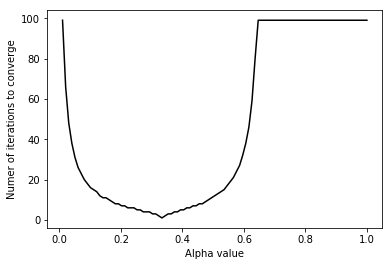

In [7]:
#problem 4
def opt_alpha(f, f_prime, x0, alphavec, tol = 1e-5, maxiter = 15):
    results = np.zeros_like(alphavec)
    for i, alpha in enumerate(alphavec):
        results[i] = d1_newton_bt(f, f_prime, x0, maxiter= maxiter, alpha = alpha)[2]
    return results
alphavec = np.linspace(1e-5, 1, 100)
alpha_comparison =  opt_alpha(f3, f3_p, x0, alphavec, maxiter = 100)
# plotting
alpha_compare_fig = plt.figure()
plt.plot(alphavec[1:], alpha_comparison[1:], "k")
plt.ylabel("Numer of iterations to converge")
plt.xlabel("Alpha value")
plt.show()

6.4e-07 True 5
[ 1.00000078  1.99999999] True 30


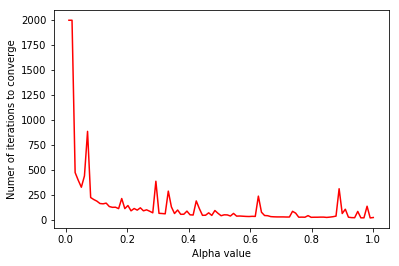

In [8]:
#problem 5
# modifying the backtracking newton method first
def md_newton_bt(f, f_prime, x0, tol = 1e-5, maxiter = 15, alpha = 1):
    if np.isscalar(x0):
        return d1_newton_bt(f, f_prime, x0, tol = tol, maxiter = maxiter, alpha = alpha)
    for k in range(maxiter):
        indicator = False
        y = la.solve(f_prime(x0), f(x0))
        x1 = x0 - alpha*y
        if la.norm(x1 - x0) < tol:
            indicator = True
            break
        x0 = x1
    return x1, indicator, k
# testing on 1-d case
x5_bar_bt, convergence5_bt, numiter5_bt = md_newton_bt(f3, f3_p, x0, alpha = .4)
print(x5_bar_bt, convergence5_bt, numiter5_bt)
# testing on multiple dimensional case
def f5 (xvec):
    y = np.zeros_like(xvec)
    y[0] = (xvec[0] - 1)**2 + (xvec[1] - 2)**2
    y[1] = (xvec[0] - 1)**3 + (xvec[1] - 2)**4
    return y

def f5_p (xvec):
    y = np.zeros((2,2))
    y[0,0] = 2*(xvec[0] - 1)
    y[0,1] = 2*(xvec[1] - 2)
    y[1, 0] = 3*(xvec[0] - 1)**2
    y[1, 1] = 4*(xvec[1] - 2)**3
    return y
xvec0 = np.array([1.05, 1.95])
x5_bar_bt, convergence5_bt, numiter5_bt = md_newton_bt(f5, f5_p, xvec0, tol = 1e-6, maxiter = 5000, alpha = 1)
print(x5_bar_bt, convergence5_bt, numiter5_bt)
# we also need to modify the problem 4 equation
def md_opt_alpha(f, f_prime, x0, alphavec, tol = 1e-5, maxiter = 15):
    results = np.zeros_like(alphavec)
    if np.isscalar(x0):
        for i, alpha in enumerate(alphavec):
            results[i] = d1_newton_bt(f, f_prime, x0, maxiter= maxiter, alpha = alpha)[2]
    else:
        for i, alpha in enumerate(alphavec):
            results[i] = md_newton_bt(f, f_prime, x0, maxiter= maxiter, alpha = alpha)[2]
    
    return results
# testing on this 
alphavec = np.linspace(1e-5, 1, 100)
#alpha_comparison_1d =  opt_alpha(f3, f3_p, x0, alphavec, maxiter = 2000)
alpha_comparison_md =  md_opt_alpha(f5, f5_p, xvec0, alphavec, tol = 1e-10, maxiter = 2000)

# plotting
alpha_compare_fig = plt.figure()
#plt.plot(alphavec[1:], alpha_comparison_1d[1:], "k")
plt.plot(alphavec[1:], alpha_comparison_md[1:], "r")
plt.ylabel("Numer of iterations to converge")
plt.xlabel("Alpha value")
plt.show()

In [9]:
#problem 6
# we initialize parameters first
Lambda = 5
Delta  = 1

def f6 (xvec):
    y = np.zeros_like(xvec)
    y[0] = Lambda*xvec[0]*xvec[1] - xvec[0]*(1 + xvec[1])
    y[1] = -xvec[0]*xvec[1] + (Delta - xvec[1])*(1 + xvec[1])
    return y

def f6_p (xvec):
    y = np.zeros((2,2))
    y[0,0] = Lambda*xvec[1] - (1 + xvec[1])
    y[0,1] = Lambda*xvec[0] - xvec[0]
    y[1, 0] = -xvec[1]
    y[1, 1] = -xvec[0] - 2*xvec[1] + Delta - 1
    return y

# we will now write a function to find the initial point
def init_finder (f, f_p, target1, target2, target3):
    xvec = np.linspace(-0.25, 0, 1000)
    yvec = np.linspace(0, 4, 1000)
    indicator = False
    for i, x in enumerate(xvec):
        for j, y in enumerate(yvec):
            vec = np.array([x, y])
            root1 = md_newton_bt(f, f_p, vec, tol = 1e-10, maxiter = 500, alpha = 1)[0]
            root2 = md_newton_bt(f, f_p, vec, tol = 1e-10, maxiter = 500, alpha = 0.55)[0]
            if la.norm(root1 - target1) < 1e-10 or la.norm(root1 - target2) < 1e-10:
                if la.norm(root2 - target3) < 1e-10:
                    print("We find it!")
                    print("Initial value should be: ", vec)
                    indicator = True
                    return vec
                    break
    if indicator == False:
        print("Oops, we couldn't find it")
    return indicator

target1 = np.array([0, 1])
target2 = np.array([0, -1])
target3 = np.array([3.75, 0.25])

init_finder(f6, f6_p, target1, target2, target3 )
# we define the function next


We find it!
Initial value should be:  [-0.25       0.2042042]


array([-0.25     ,  0.2042042])

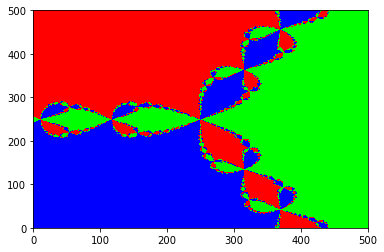

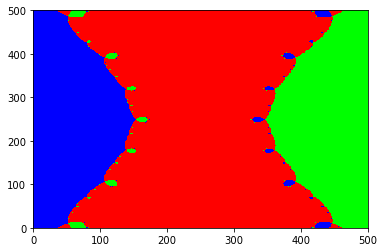

In [74]:
#problem 7
rmin, rmax, imin, imax = -1.5, 1.5, -1.5, 1.5
res = 500
iters = 100
f7 = lambda x: x**3 - 1
Df7 = lambda x: 3*x**2
f8 = lambda x: x**3 - x
Df8 = lambda x: 3*x**2 - 1
def basin_attract (f, f_prime, rmin, rmax, imin, imax, res, iters):
    #construct the grid
    x_real = np.linspace(rmin, rmax, res)
    x_imag = np.linspace(imin, imax, res)
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j*X_imag
    for k in range(iters):
        X_1 = X_0 - f(X_0)/f_prime(X_0)
        X_0 = X_1 # for the last iteration, updated meshgrid will be stored int X_0
    X_bar = np.round(X_0, 8)
    roots = np.unique(X_bar)
    Y = np.zeros((res, res))
    for i in range(res):
        for j in range(res):
            Y[i, j] = np.where(roots == X_bar[i, j])[0]
    #plotting
    fig = plt.figure()
    plt.pcolormesh(Y, cmap = "brg")
    plt.show()
    
    return Y

test1 = basin_attract (f7, Df7, rmin, rmax, imin, imax, res, iters)
test2 = basin_attract (f8, Df8, rmin, rmax, imin, imax, res, iters)

